## [Clustering Jerárquico](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

Los métodos de clustering jerárquico buscan agrupar las samples más similares para formar grupos con características similares.

1. **Agglomerative**: cada sample es un cluster y en cada paso va agrupando los clusters más similares hasta quedarse con un solo cluster
2. **Divisive**: todas las samples comienzan en el mismo cluster y en cada paso va cortando las samples menos similares hasta que todas las samples sean un cluster distinto

En esta notebook vamos a ver el primer tipo de clustering jerárquico aplicado a un dataset de tendencias de compra de clientes de un shopping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [2]:
# cargamos el dataset
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data_frame = pd.read_csv(name, sep=",")
data_frame.head()

Saving Tendencias compras.csv to Tendencias compras.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data_frame.shape

(200, 5)

Este dataset tiene de features una ID asociada a cada uno de los 200 clientes, el género binario, la edad de la persona, el ingreso anual (en miles de dolares) y un puntaje asociado a cuán a menudo un cliente gasta plata en el shopping siendo 100 el cliente que más gasta.

Vamos a tratar de agrupar a los clientes utilizando solo dos features del dataset: su sueldo anual y el puntaje de gastos

In [4]:
data_selected = data_frame.iloc[:, 3:5].values
pd.DataFrame(data_selected)

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


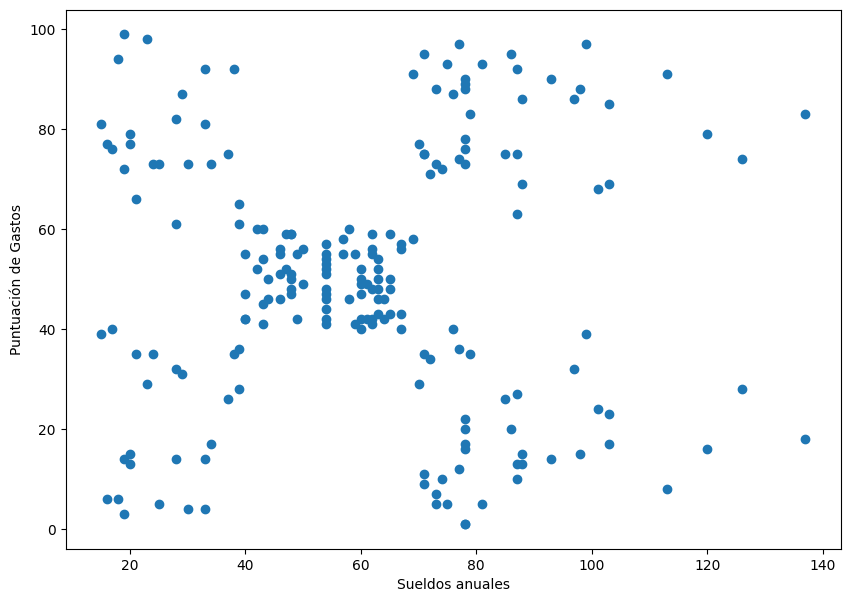

In [5]:
# graficos los datos para ver si vemos algun patrón
plt.figure(figsize=(10, 7))
plt.scatter(data_selected[:,0], data_selected[:,1])
plt.xlabel("Sueldos anuales")
plt.ylabel("Puntuación de Gastos")
plt.show()

##¿Qué podemos ver? ¿se ven clusters claramente? ¿cuántos?

Vamos a realizar un dendograma del dataset utilizando el método 'ward' para calcular distancias (es el que se suele ultilizar y viene por default). Este método minimiza la varianza dentro de un cluster y maximiza la varianza entre clusters.

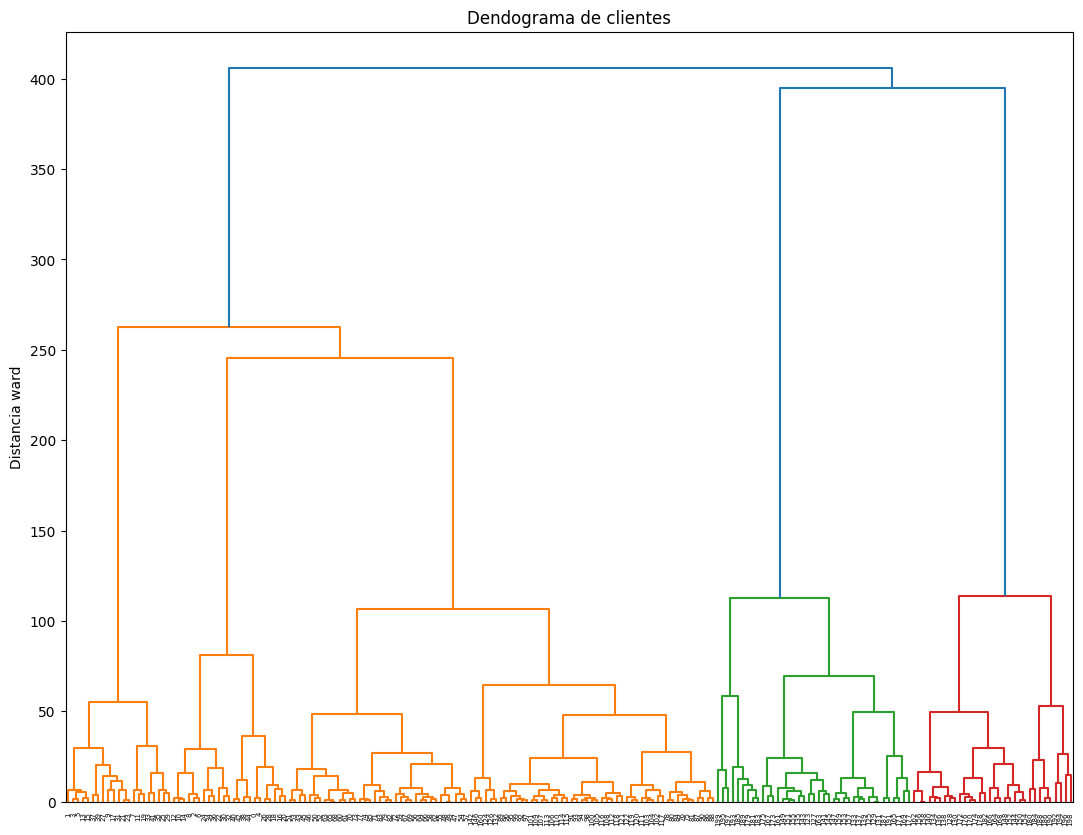

In [6]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(13, 10))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma.
# El input de esta función es la función 'linkage' donde se especifica la distancia para utlizar en cada paso del método
dend = shc.dendrogram(shc.linkage(data_selected, method='ward'))

Lo que buscamos en el dendograma es la mayor distancia vertical sin que haya una línea horizontal para hacerle un corte (representado como una linea horizontal que cruza todos los datos) y quedarnos con k clusters (donde k es el número de lineas verticales que intersectan el corte.

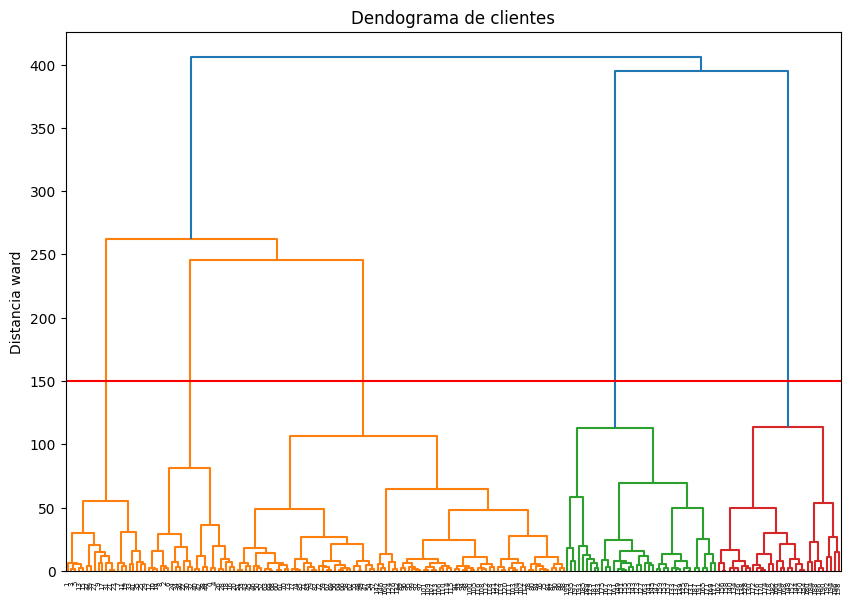

In [7]:
# Mismo código anterior
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

dend = shc.dendrogram(shc.linkage(data_selected, method='ward'))

# la única línea de código nueva. Marca una línea roja horizontal
plt.axhline(150, c='r')

Vemos que el corte intersecta con 5 líneas verticales por lo que vamos a utilizar el método de clustering jerárquico de sklearn con n_clusters=5

In [8]:
# Importo el método de clustering jerárquico (bottom-up)
from sklearn.cluster import AgglomerativeClustering

Ahora sí aplicamos el método de clusterización jerárquica (bottom-up) con 5 clusters, la distancia euclidea para la afinidad y la distancia ward para el linkage

In [10]:
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(data_selected)  # fit_predict hace lo mismo que fit pero devuelve el vector de etiquetas de las samples

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Veamos cómo se ven los datos agrupados en el espacio de features

Text(0, 0.5, 'Puntaje de gastos')

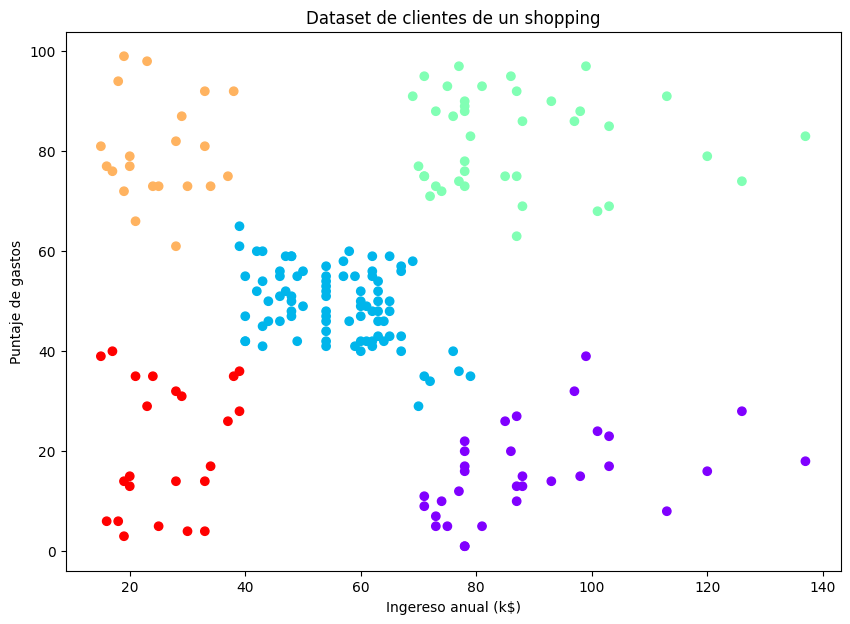

In [11]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(10, 7))
plt.title("Dataset de clientes de un shopping")
plt.scatter(data_selected[:,0], data_selected[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Ingereso anual (k$)")
plt.ylabel("Puntaje de gastos")

##Comente este resultado. ¿Qué tendencia de compras tiene cada color?

## [Coeficiente de Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

El coeficiente de Silhouette mide qué tan cerca está una muestra a las otras muestras de su cluster y qué tan lejos está con respecto a las muestras del cluster más cercano. Este coeficiente toma valores de [-1,1], -1 sería si los clusters están superpuestos, 0 si hay overlap y 1 que no se tocan.

El coeficiente de Silhouette de cada sample la podemos obtener con la clase 'silhouette_samples' de sklearn.metrics

El puntaje de Silhouette es el promedio de los coeficientes de Silhouette de todas las samples y se computa con la clase 'silhouette_score' de sklearn.metrics. Hay que pasarle a la función los datos y sus etiquetas.

In [12]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

In [14]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
     cluster.fit(data_selected)
     score = silhouette_score(data_selected, cluster.labels_)
     silhouette_coefficients.append(score)

Graficamos el puntaje de Silhouette en función de k

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

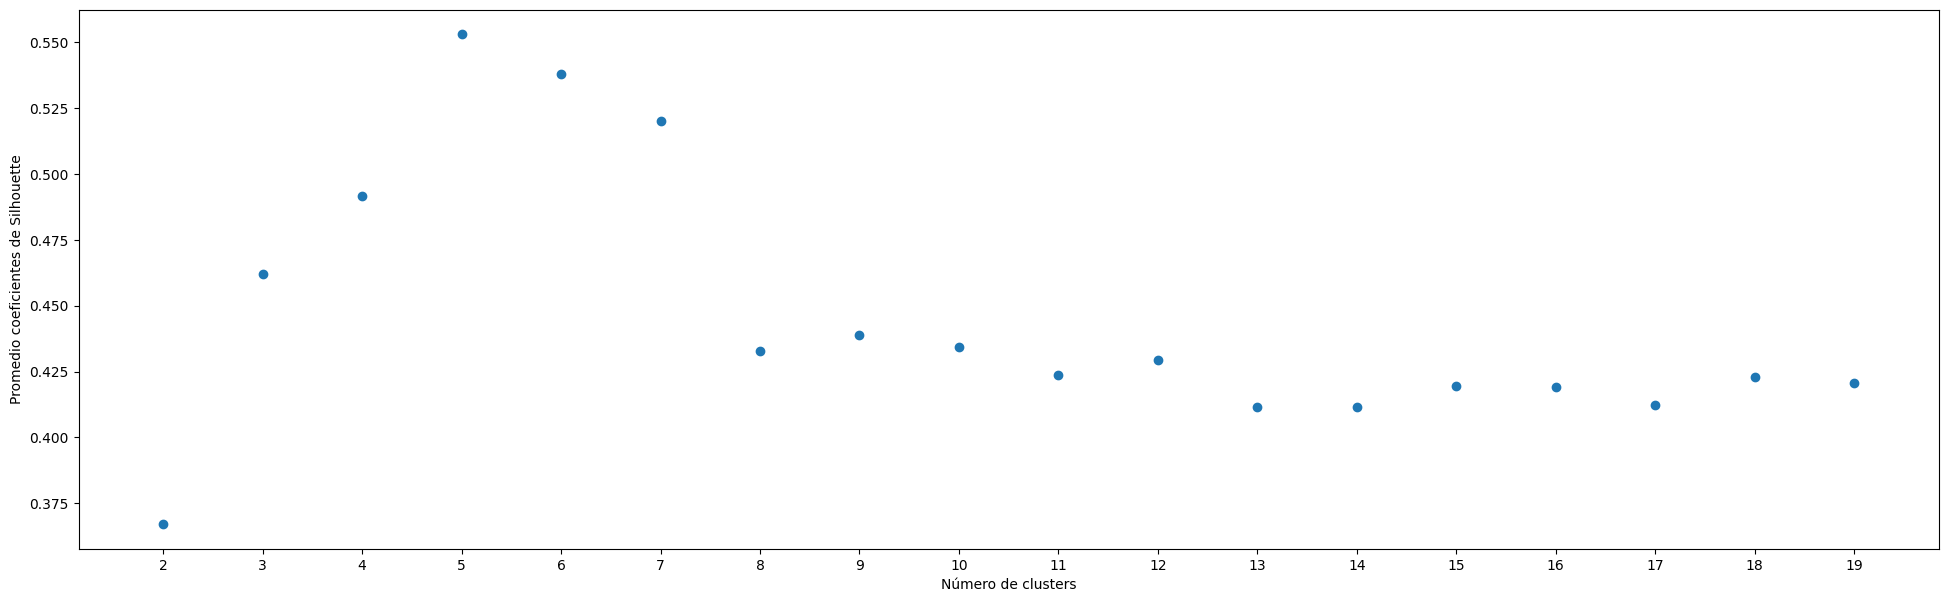

In [15]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSE vs K
ax.scatter(range(2, 20), silhouette_coefficients)
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

## ¿Qué podemos decir de este gráfico?

#Resumen de funciones importantes:

Puntaje de Silhouette

```
from sklearn.metrics import silhouette_samples # importamos la clase que computa el coeficiente de silhouette para cada sample

from sklearn.metrics import silhouette_score # importamos la clase con la que se calcula el puntaje de silhouette (que es el promedio de los coeficientes de silhouette para cada sample)

silhouette_score(data, kkkmeans.labels_) # Devuelve el puntaje de silhouette y toma como input los datos y las etiquetas asociadas
```

Clustering Jerárquico

```
import scipy.cluster.hierarchy as shc # Paquete de scipy que tiene la clase 'dendograma' y 'linkage' que vamos a utilizar

dend = shc.dendrogram(shc.linkage(data, method='ward')) # Para hacer un dendograma de los datos usando como linkage la distancia ward

from sklearn.cluster import AgglomerativeClustering # Importo el método de clustering jerárquico (bottom-up)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') # Creamos el modelo

cluster.fit_predict(sdata)  # Ajustamos el modelo. '.fit_predict' hace lo mismo que '.fit' pero imprime el vector de etiquetas de las samples
```


#Ejercicio Propuesto:

Realice el proceso completo, pero ahora use otro par de variables. Compare resultados.